# Mammalia-Macaque-Dominance Network

Laura Silvana Alvarez Luque - Daniel Losada Molina


The dominance relations between *Macaca fuscata* females were determined based on approach-retreat episodes around the food. The dominance range order was arranged based on these dyadic relations. Dominance is defined as "Physical contact unique to aggressive dominance interactions such as biting, head butting, fighting"

- **Vertices:** 62 Macaques.
- **Edges:** 1.167 edges representing the pairwise dominance between macaques.
- **Weights:** Frequency of the dominance.
- **Notes:**  This is a animal interation network, undirected and weighted.

![Macaca Fuscata](./imgs/Macaca.png)


In [35]:
import zipfile

import matplotlib.pyplot as plt
import igraph as ig
import plotly.graph_objects as go
import networkx as nx
import numpy as np



In [11]:
def unzip_file(zip_path, extract_to):
    """
    Unzip a file from zip_path into the extract_to directory.
    """
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

unzip_file('./mammalia-macaque-dominance.zip', './data')


In [ ]:
g = ig.Graph.Read_Ncol("data/mammalia-macaque-dominance.edges", weights=True, directed=False)

IGRAPH UNW- 62 1167 -- 
+ attr: name (v), weight (e)


In [13]:
def plot_simple_graph(g):
    # Layout for node positions
    layout = g.layout("fr")  # Fruchterman-Reingold (force-directed)

    # Plot using igraph's built-in plot function
    ig.plot(
        g,
        layout=layout,
        vertex_label=g.vs.indices,  # show node indices
        edge_width=[w for w in g.es["weight"]],
        bbox=(800, 800),
        margin=50
    )

In [14]:
def plotly_graph(g):    
    # Convert to NetworkX
    G_nx = g.to_networkx()

    # Get layout positions
    pos = nx.spring_layout(G_nx)

    # Prepare edge lines
    edge_x = []
    edge_y = []
    for u, v in G_nx.edges():
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]

    edge_trace = go.Scatter(
        x=edge_x,
        y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines',
        showlegend=False
    )

    # Create "hover points" at edge midpoints
    edge_hover_x = []
    edge_hover_y = []
    edge_text = []

    for u, v, data in G_nx.edges(data=True):
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        edge_hover_x.append((x0 + x1) / 2)
        edge_hover_y.append((y0 + y1) / 2)
        weight = data.get("weight", 1)
        edge_text.append(f"{u} — {v}<br>weight: {weight}")

    edge_hover_trace = go.Scatter(
        x=edge_hover_x,
        y=edge_hover_y,
        mode='markers',
        hoverinfo='text',
        text=edge_text,
        marker=dict(size=5, color='rgba(0,0,0,0)'),  # invisible
        showlegend=False
    )

    # Prepare node positions
    node_x = []
    node_y = []
    node_text = []
    for node in G_nx.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(f"Node {node}")

    node_trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode='markers+text',
        text=[str(n) for n in G_nx.nodes()],
        textposition='top center',
        hoverinfo='text',
        marker=dict(
            size=10,
            color='lightblue',
            line_width=1
        )
    )

    # Combine everything
    fig = go.Figure(
        data=[edge_trace, edge_hover_trace, node_trace],
        layout=go.Layout(
            title='Dominance Network of Macaques',
            showlegend=False,
            hovermode='closest',
            margin=dict(b=20, l=5, r=5, t=40),
            xaxis=dict(showgrid=False, zeroline=False),
            yaxis=dict(showgrid=False, zeroline=False)
        )
    )

    fig.show()

#plotly_graph(g)


![Macaca Fuscata](./imgs/Graph.png)


In [32]:
print(g.summary())
order = g.vcount()
size = g.ecount()

print(f"The order of the network is: {order}")
print(f"The size of the network is: {size}")

IGRAPH UNW- 62 1167 -- 
+ attr: name (v), weight (e)
The order of the network is: 62
The size of the network is: 1167


In [ ]:
# degrees
print(f"maximum degree: {g.maxdegree()}")

degrees = []

for i in range(order):
    degree = g.vs[i].degree()
    degrees.append(degree)
    
print(degrees)    
#print(f"degree of vertex {i}, = {g.vs[i].degree()}")


maximum degree: 55
[38, 24, 44, 36, 38, 41, 49, 46, 46, 47, 31, 38, 34, 35, 36, 42, 35, 53, 40, 35, 45, 39, 35, 32, 47, 40, 35, 44, 33, 55, 43, 32, 39, 31, 45, 43, 37, 32, 51, 34, 46, 37, 45, 37, 34, 17, 29, 38, 44, 34, 31, 30, 34, 43, 27, 36, 37, 44, 29, 34, 28, 20]


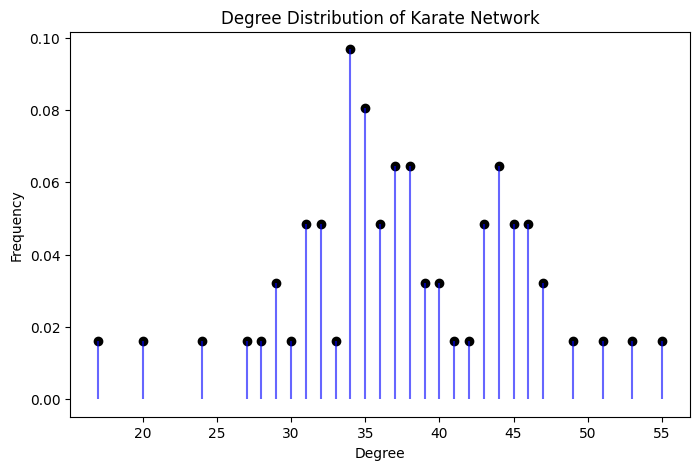

In [ ]:
unique_degrees, counts = np.unique(degrees, return_counts=True)
probabilities = counts / counts.sum()  # Normalize to get probability

# Plot the degree distribution
plt.figure(figsize=(8, 5))
plt.scatter(unique_degrees, probabilities, color='black')  # Dots
plt.vlines(unique_degrees, 0, probabilities, color='blue', alpha=0.6)  # Vertical lines

# Labels and title
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Macaque Dominance")

# Show plot
plt.show()


The dominance interactions between the macaques are 

In [42]:
# Compute weighted degree (strength) for each node
weighted_degrees = g.strength(weights=g.es["weight"])

# Print results
for idx, strength in enumerate(weighted_degrees):
    print(f"Node {idx}: Weighted Degree = {strength}")

Node 0: Weighted Degree = 82.0
Node 1: Weighted Degree = 41.0
Node 2: Weighted Degree = 80.0
Node 3: Weighted Degree = 61.0
Node 4: Weighted Degree = 97.0
Node 5: Weighted Degree = 83.0
Node 6: Weighted Degree = 94.0
Node 7: Weighted Degree = 118.0
Node 8: Weighted Degree = 108.0
Node 9: Weighted Degree = 136.0
Node 10: Weighted Degree = 59.0
Node 11: Weighted Degree = 56.0
Node 12: Weighted Degree = 51.0
Node 13: Weighted Degree = 71.0
Node 14: Weighted Degree = 82.0
Node 15: Weighted Degree = 90.0
Node 16: Weighted Degree = 62.0
Node 17: Weighted Degree = 122.0
Node 18: Weighted Degree = 109.0
Node 19: Weighted Degree = 65.0
Node 20: Weighted Degree = 104.0
Node 21: Weighted Degree = 76.0
Node 22: Weighted Degree = 85.0
Node 23: Weighted Degree = 52.0
Node 24: Weighted Degree = 98.0
Node 25: Weighted Degree = 73.0
Node 26: Weighted Degree = 74.0
Node 27: Weighted Degree = 94.0
Node 28: Weighted Degree = 70.0
Node 29: Weighted Degree = 143.0
Node 30: Weighted Degree = 83.0
Node 31: We

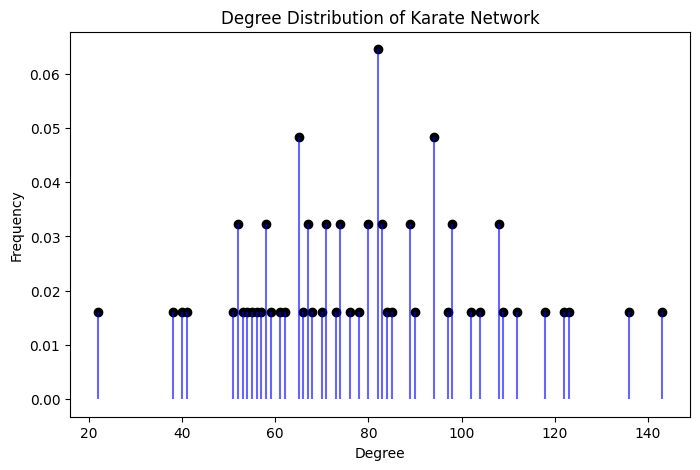

In [ ]:
unique_degrees, counts = np.unique(weighted_degrees, return_counts=True)
probabilities = counts / counts.sum()  # Normalize to get probability

# Plot the degree distribution
plt.figure(figsize=(8, 5))
plt.scatter(unique_degrees, probabilities, color='black')  # Dots
plt.vlines(unique_degrees, 0, probabilities, color='blue', alpha=0.6)  # Vertical lines

# Labels and title
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Macaque Dominance with weights")

# Show plot
plt.show()


In [45]:
counts.sum()

np.int64(62)

In [57]:
# Get the adjacency matrix
adj_matrix = np.array(g.get_adjacency().data)
adj_matrix_w = np.array(g.get_adjacency(attribute="weight").data)

# Print the adjacency matrix
print(adj_matrix)
print(adj_matrix_w)

[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
[[0. 3. 1. ... 0. 0. 0.]
 [3. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 4. 0.]
 [0. 0. 0. ... 4. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
adj_matrix.shape
adj_matrix.sum(axis=1)
adj_matrix.sum(axis=0)
#3844
print(np.count_nonzero(adj_matrix == 0))
print(np.count_nonzero(adj_matrix == 1))

1510
2334
0
